In [53]:
# !pip install imblearn

    100% |████████████████████████████████| 153kB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 7.6MB 152kB/s ta 0:00:011  2% |▉                               | 194kB 1.9MB/s eta 0:00:04
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

# Classifiers libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [4]:
data_set = pd.read_csv('./resultadosfinais2017.csv', sep=';')
data_set.head()

,ano,nescolnome,ebairrnome,eescolruae,aescolnume,cescolrpae,modens,compens,anoensino,esermodesc,nmodennome,turma,nturesnome,mat,situ,esitaldesc
0,2017,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,12998192,RN,RENV S/SIT FINAL DEF
1,2017,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,16065662,TR,TR DUR ANO FORA REDE
2,2017,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15685799,RN,RENV S/SIT FINAL DEF
3,2017,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15655024,RN,RENV S/SIT FINAL DEF
4,2017,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15641112,RN,RENV S/SIT FINAL DEF


In [7]:
for c in data_set.columns:
    print (c, len(data_set[c].unique()))

ano 1
nescolnome 335
ebairrnome 77
eescolruae 290
aescolnume 195
cescolrpae 6
modens 6
compens 10
anoensino 23
esermodesc 24
nmodennome 6
turma 12
nturesnome 4
mat 95978
situ 9
esitaldesc 9


In [8]:
data_set.columns
data_set2 = data_set.drop(['ano', 'aescolnume', 'eescolruae', 'esitaldesc'], axis=1)
data_set2

,nescolnome,ebairrnome,cescolrpae,modens,compens,anoensino,esermodesc,nmodennome,turma,nturesnome,mat,situ
0,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,12998192,RN
1,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,16065662,TR
2,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15685799,RN
3,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15655024,RN
4,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15641112,RN
5,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15641597,RN
6,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,14321661,RN
7,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,17769523,RN
8,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,17612209,RN
9,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,17612810,RN


In [9]:
for c in data_set2.columns:
    print (c, len(data_set2[c].unique()))

nescolnome 335
ebairrnome 77
cescolrpae 6
modens 6
compens 10
anoensino 23
esermodesc 24
nmodennome 6
turma 12
nturesnome 4
mat 95978
situ 9


In [10]:
data_set2.to_csv('./data_set_escola.csv', index=False)

RPA 01 – CENTRO
Boa Vista, Cabanga, Ilha do Leite, Ilha Joana Bezerra, Paissandu, Recife, Santo Amaro, Santo Antonio, Sao Jose, Soledade.

RPA 02 – NORTE
agua Fria, Alto Santa Terezinha, Arruda, Beberibe, Bomba do Hemeterio, Cajueiro, Campina do Barreto, Campo Grande, Dois Unidos, Encruzilhada, Fundao, Hipodromo, Linha do Tiro, Ponto de Parada, Porto da Madeira, Rosarinho, Torreao.

RPA O3 – NORDESTE
Aflitos, Alto do Mandu, Alto do Bonifacio, Alto Jose do Pinho, Apipucos, Brejo da Guabiraba, Brejo do Beberibe, Casa Amarela, Casa Forte, Corrego do Jenipapo, Derby, Dois Irmaos, Espinheiro, Gracas, Guabiraba, Jaqueira, Macaxeira, Mangabeira, Monteiro, Morro da Conceicao, Nova Descoberta, Parnamirim, Passarinho, Pau Ferro, Poco, Santana, Sitio dos Pintos, Tamarineira, Vasco da Gama.

RPA 04 – OESTE
Caxanga, Cidade Universitaria, Cordeiro, Engenho do Meio, Ilha do Retiro, Iputinga, Madalena, Prado, Torre, Torroes, Varzea, Zumbi.

RPA 05 – SUDOESTE
Afogados, Areias, Barro, Bongi, Cacote, Coqueiral, Curado, Estancia, Jardim Sao Paulo, Jiquia, Mangueira, Mustardinha, San Martin, Sancho, Tejipio, Toto.

RPA 06 – SUL
Boa Viagem, Brasilia Teimosa, Ibura, COHAB, Imbiribeira, IPSEP, Jordao, Pina.

In [95]:
data_set = pd.read_csv('./data_set_escola.csv')
data_set.head()

,nescolnome,ebairrnome,cescolrpae,modens,compens,anoensino,esermodesc,nmodennome,turma,nturesnome,mat,situ
0,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,12998192,RN
1,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,16065662,TR
2,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15685799,RN
3,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15655024,RN
4,ABILIO GOMES,BOA VIAGEM,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15641112,RN


In [47]:
# data_set.ebairrnome.unique()
centro = ['Boa Vista', 'Cabanga', 'Ilha do Leite', 'Ilha Joana Bezerra', 'Paissandu', 'Recife', 'Santo Amaro', 'Santo Antonio', 'Sao Jose', 'Soledade', 'coelhos']
norte = ['peixinhos', 'agua Fria', 'Alto Santa Terezinha', 'Arruda', 'Beberibe', 'Bomba do Hemeterio', 'Cajueiro', 'Campina do Barreto', 'Campo Grande', 'Dois Unidos', 'Encruzilhada', 'Fundao', 'Hipodromo', 'Linha do Tiro', 'Ponto de Parada', 'Porto da Madeira', 'Rosarinho', 'Torreao']
nordeste = ['Aflitos', 'Alto do Mandu', 'Alto jose Bonifacio', 'Alto Jose do Pinho', 'Apipucos', 'Brejo da Guabiraba', 'Brejo de Beberibe', 'Casa Amarela', 'Casa Forte', 'Corrego do Jenipapo', 'Derby', 'Dois Irmaos', 'Espinheiro', 'Gracas', 'Guabiraba', 'Jaqueira', 'Macaxeira', 'Mangabeira', 'Monteiro', 'Morro da Conceicao', 'Nova Descoberta', 'Parnamirim', 'Passarinho', 'Pau Ferro', 'Poco', 'Santana', 'Sitio dos Pintos', 'Tamarineira', 'Vasco da Gama']
oeste = ['Caxanga', 'Cidade Universitaria', 'Cordeiro', 'Engenho do Meio', 'Ilha do Retiro', 'Iputinga', 'Madalena', 'Prado', 'Torre', 'Torroes', 'Varzea', 'Zumbi']
sudoeste = ['Afogados', 'Areias', 'Barro', 'Bongi', 'Cacote', 'Coqueiral', 'Curado', 'Estancia', 'Jardim Sao Paulo', 'Jiquia', 'Mangueira', 'Mustardinha', 'San Martin', 'Sancho', 'Tejipio', 'Toto']
sul = ['Boa Viagem', 'Brasilia Teimosa', 'Ibura', 'COHAB', 'Imbiribeira', 'IPSEP', 'Jordao', 'Pina']

# print (len(centro) + len(norte) + len(nordeste) + len(oeste) + len(sudoeste) + len(sul))
# len(data_set.ebairrnome.unique())
centro = list(map(lambda x: x.lower(), centro))
norte = list(map(lambda x: x.lower(), norte))
nordeste = list(map(lambda x: x.lower(), nordeste))
oeste = list(map(lambda x: x.lower(), oeste))
sudoeste = list(map(lambda x: x.lower(), sudoeste))
sul = list(map(lambda x: x.lower(), sul))

def rpa(bairro):
    bairro = bairro.lower()
    if bairro in centro:
        return "Centro"
    elif bairro in norte:
        return "Norte"
    elif bairro in nordeste:
        return "Nordeste"
    elif bairro in oeste:
        return "Oeste"
    elif bairro in sudoeste:
        return "Sudoeste"
    elif bairro in sul:
        return "Sul"
    return "Não Encontrado"

# bairros = centro + norte + nordeste + oeste + sudoeste + sul
# bairros = list(map(lambda x: x.lower(), bairros))
# for b in list(map(lambda x: x.lower(), data_set.ebairrnome.unique())):
#     if b not in bairros:
#         print (b, "not in rpa")
data_set["RPA"] = data_set.apply(lambda row: rpa(row.ebairrnome),axis=1)

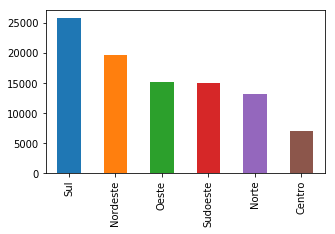

In [50]:
data_set.RPA.value_counts().plot.bar(figsize=(5,3))

In [96]:
data_set.columns

Index(['nescolnome', 'ebairrnome', 'cescolrpae', 'modens', 'compens',
       'anoensino', 'esermodesc', 'nmodennome', 'turma', 'nturesnome', 'mat',
       'situ'],
      dtype='object')

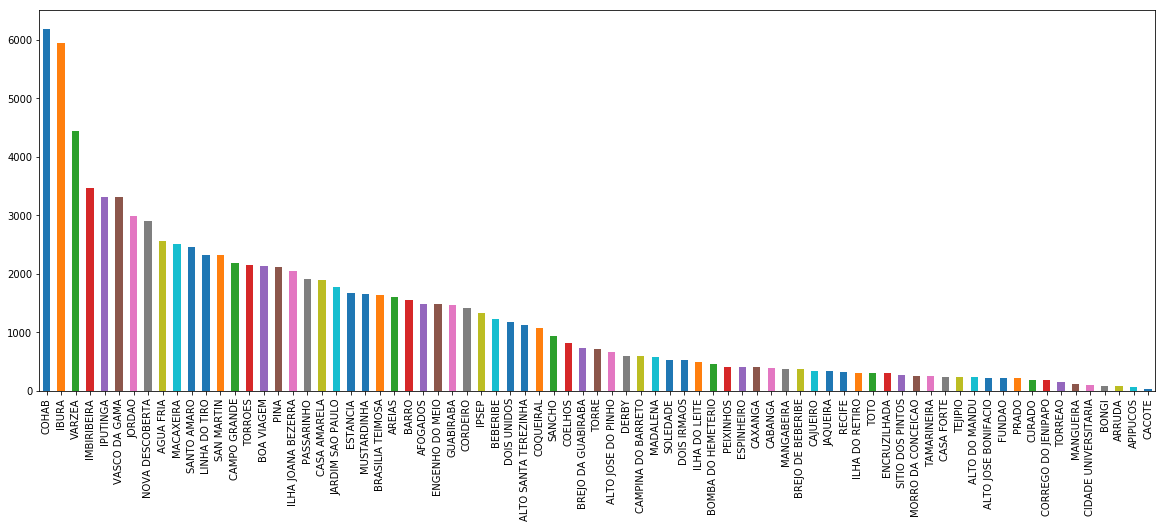

In [16]:
data_set.ebairrnome.value_counts().plot.bar(figsize=(20,7))

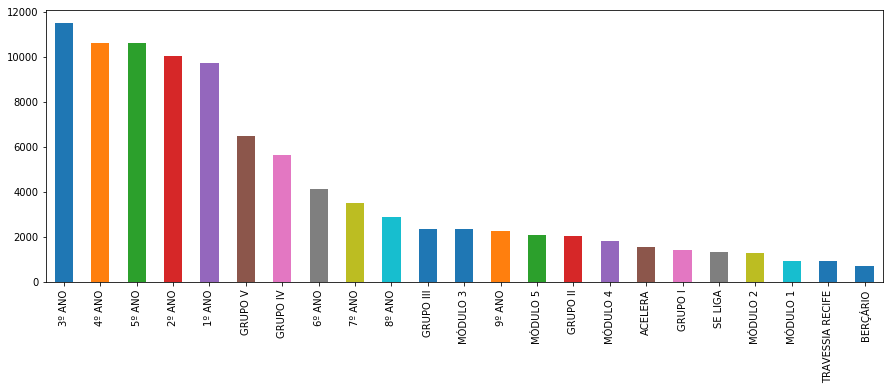

In [25]:
data_set.anoensino.value_counts().plot.bar(figsize=(15,5))

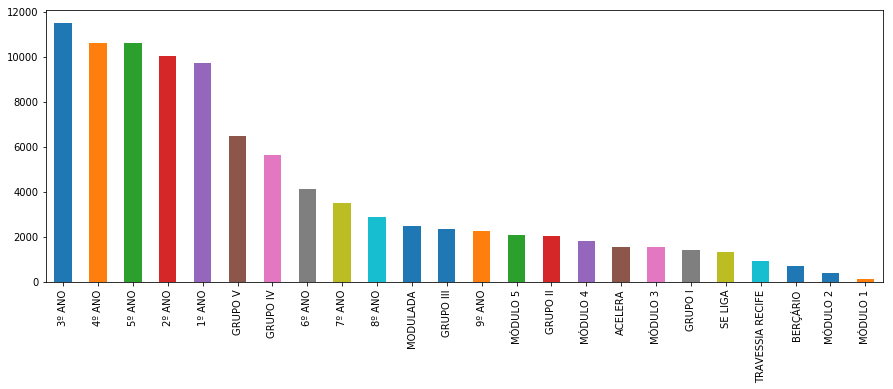

In [24]:
data_set.esermodesc.value_counts().plot.bar(figsize=(15,5))

ENSINO FUNDAMENTAL              65196
EDUCACAO INFANTIL               18593
EDUCACAO  JOVENS E ADULTOS       8388
CORREÇÃO DE FLUXO                3782
EJA ESPECIAL                       29
ENSINO FUNDAMENTAL  ESPECIAL        8
Name: nmodennome, dtype: int64

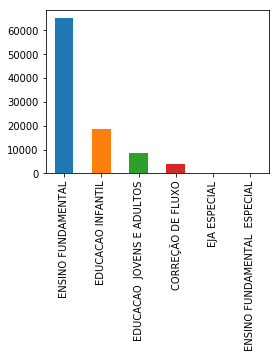

In [32]:
data_set.nmodennome.value_counts().plot.bar(figsize=(4,3))
data_set.nmodennome.value_counts()

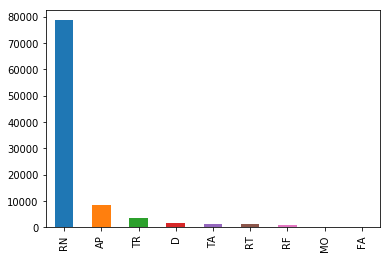

In [27]:
data_set.situ.value_counts().plot.bar(figsize=(6,4))

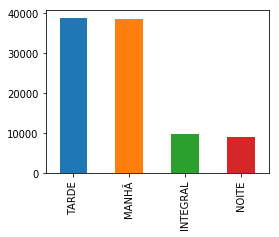

In [29]:
data_set.nturesnome.value_counts().plot.bar(figsize=(4,3))

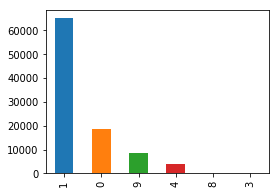

In [30]:
data_set.modens.value_counts().plot.bar(figsize=(4,3))

In [51]:
data_set.to_csv('./data_set_escola_rpa.csv', index=False)

In [2]:
data_set = pd.read_csv('./data_set_escola_rpa.csv')

In [3]:
# def oversampling_replacementoversam(train, ):
#     train = np.resize(train, labels.shape)
    
#     return train
# data_set.columns
data_set_final = data_set.drop(['ebairrnome', 'cescolrpae', 'modens', 'esermodesc', 'mat'], axis=1)
# data_set_final.compens.unique()
data_set_final.to_csv('./data_set_escola_final.csv', index=False)

## hipóteses

1. Dado o rpa, turma, turno e situação para dizer o modernnome
2. Dado o nome da escola, anoensino e a situação dizer qual é a região politica (rpa)
3. Dado nmodennome, compens, rpa e situ dizer qual é o turno
4. Dado rpa, turma e turno dizer qual é a situação
5. Dado modernnome, rpa, turno e situacao dizer anoensino


In [2]:
data_set = pd.read_csv('./data_set_escola_final.csv')

In [20]:
data_set.columns

Index(['nescolnome', 'compens', 'anoensino', 'nmodennome', 'turma',
       'nturesnome', 'situ', 'RPA'],
      dtype='object')

In [5]:
def oversampling(data_set, label_column):
    """
    Fazer o oversampling da base de dados
    
    data_set = pd.DataFrame() como base de dados de entrada
    label_column = coluna que vai ser considerada como label no data_set
    
    retorna o data_set original com feito o oversampling por repetição 
    considerando a coluna informada como label
    """
    
    columns = data_set.columns
    class_size = max(data_set[label_column].value_counts())
    data = pd.DataFrame()
    
    for class_label in data_set[label_column].unique():
        data_class_label = data_set[data_set[label_column] == class_label].values
        data_class_label = np.resize(data_class_label, (class_size, data_class_label.shape[1]))
        
        data = data.append(pd.DataFrame(data_class_label), ignore_index=True)
        
    np.random.shuffle(data.values)
    
    data = pd.DataFrame(data)
    data.columns = columns
    return data


In [80]:
def stringToNumber(data_set, column):
    """
    converter nomes das categorias para numeros
    
    data_set = pd.DataFrame() como base de dados de entrada
    column = coluna que vai ser considerada para renomear os valores no data_set
    
    retorna o data_set original com os valores da coluna informada alterados
    """
    values = data_set[column].unique()
    numbers = [i for i, v in enumerate(values)]
    data_set[column] = data_set[column].replace(values, numbers)
    
    return data_set
    

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
def splitClass(data_set, label_column):
    """
    divide a base de dados em treinamento, teste e validação
    
    data_set = pd.DataFrame() como base de dados de entrada
    label_column = coluna que vai ser considerada como label no data_set
    """
    
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
#     data_validation = pd.DataFrame()
    
    for class_label in data_set[label_column].unique():
        data_class_label = data_set[data_set[label_column] == class_label]
        train, test = train_test_split(data_class_label, # base de dados que vai ser dividida
                                               test_size=1/5, # proporção da divisão dos dados
                                               random_state=42)
        
        data_train = data_train.append(train, ignore_index=True)
        data_test = data_test.append(test, ignore_index=True)
#         data_validation = data_validation.append(validation, ignore_index=True)
        
    return [data_train, data_test]

In [56]:
data_set.columns

Index(['nescolnome', 'compens', 'anoensino', 'nmodennome', 'turma',
       'nturesnome', 'situ', 'RPA'],
      dtype='object')

In [81]:
# 2. Dado o nome da escola, esermodesc e a situação dizer qual é a região politica (rpa)
dd = data_set

dd = stringToNumber(dd, "compens")
dd = stringToNumber(dd, "anoensino")
dd = stringToNumber(dd, "nmodennome")
dd = stringToNumber(dd, "turma")
dd = stringToNumber(dd, "nturesnome")
dd = stringToNumber(dd, "situ")
dd = stringToNumber(dd, "RPA")

# dd = dd.sample(frac=1)

train, test = splitClass(dd, "RPA")

columns = ["compens", "anoensino", "nmodennome", "turma", "nturesnome", "situ"]
label = "RPA"


X_train = train.loc[:,columns].values
X_test = test.loc[:,columns].values
y_train = train[label].values
y_test = test[label].values


In [66]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print (accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

0.32673679825018226


array([[3945,  397,   55,    3,  191,  573],
       [1753,  645,   37,  103,  185,  306],
       [1743,  196,  131,   90,  143,  332],
       [ 749,  199,   23,  333,   36,   69],
       [2022,  279,   27,   73,  313,  301],
       [2464,  271,   49,   84,  175,  907]], dtype=int64)

In [65]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print (accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

0.254192271638371


array([[2315, 1024,  500,  108,  752,  465],
       [1090,  863,  311,   93,  465,  207],
       [ 924,  669,  346,  108,  371,  217],
       [ 433,  362,  156,  214,  179,   65],
       [1107,  691,  350,   78,  627,  162],
       [1502,  793,  398,  134,  607,  516]], dtype=int64)

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers

clf = Sequential()

clf.add(Dense(20, activation='relu', input_dim=6)) # camada escondida
clf.add(Dense(10, activation='relu')) # camada escondida
clf.add(Dense(15, activation='relu')) # camada escondida
clf.add(Dense(1, activation='relu'))

sgd = optimizers.SGD(lr=0.001)
clf.compile(optimizer=sgd, 
                   loss='mean_squared_error', # metrica de erro
                   metrics=['accuracy']) # metrica de sucesso

early_stopping = EarlyStopping(monitor='val_loss', patience=20)

history = clf.fit(X_train, y_train,
                         epochs=100000, # quantidade de epocas que a rede neural vai executar
                         verbose=1,
                         shuffle=True, # utilizado para misturar as amostras a cada epoca
                         validation_data=(X_test, y_test),
                         callbacks=[early_stopping])

# clf = MLPClassifier(hidden_layer_sizes=(10,15), verbose=True, max_iter=2000) # early_stopping=True, validation_fraction=0.2,
# clf.fit(X_train, y_train)

# pred = clf.predict(X_test)
# print (accuracy_score(y_test, pred))
# confusion_matrix(y_test, pred)

# test_loss = classifier.evaluate(X_test, y_test)

Train on 76794 samples, validate on 19202 samples
Epoch 1/100000
76794/76794 [==============================] - 8s 107us/step - loss: 3.8991 - acc: 0.1292 - val_loss: 3.6770 - val_acc: 0.1193
Epoch 2/100000
76794/76794 [==============================] - 8s 103us/step - loss: 3.6790 - acc: 0.1283 - val_loss: 3.6502 - val_acc: 0.1371
Epoch 3/100000
76794/76794 [==============================] - 8s 104us/step - loss: 3.6619 - acc: 0.1288 - val_loss: 3.6454 - val_acc: 0.1343
Epoch 4/100000
76794/76794 [==============================] - 8s 103us/step - loss: 3.6525 - acc: 0.1293 - val_loss: 3.6353 - val_acc: 0.1302
Epoch 5/100000
76794/76794 [==============================] - 8s 103us/step - loss: 3.6469 - acc: 0.1294 - val_loss: 3.6533 - val_acc: 0.1262
Epoch 6/100000
76794/76794 [==============================] - 8s 103us/step - loss: 3.6432 - acc: 0.1297 - val_loss: 3.6282 - val_acc: 0.1269
Epoch 7/100000
76794/76794 [==============================] - 8s 106us/step - loss: 3.6403 - acc: 

76794/76794 [==============================] - 8s 105us/step - loss: 3.5995 - acc: 0.1304 - val_loss: 3.5942 - val_acc: 0.1302
Epoch 59/100000
76794/76794 [==============================] - 8s 105us/step - loss: 3.5992 - acc: 0.1296 - val_loss: 3.5995 - val_acc: 0.1307
Epoch 60/100000
76794/76794 [==============================] - 8s 100us/step - loss: 3.6000 - acc: 0.1300 - val_loss: 3.6006 - val_acc: 0.1296
Epoch 61/100000
76794/76794 [==============================] - 8s 100us/step - loss: 3.5999 - acc: 0.1294 - val_loss: 3.6094 - val_acc: 0.1345
Epoch 62/100000
76794/76794 [==============================] - 8s 100us/step - loss: 3.5984 - acc: 0.1289 - val_loss: 3.6020 - val_acc: 0.1297
Epoch 63/100000
76794/76794 [==============================] - 8s 100us/step - loss: 3.5981 - acc: 0.1303 - val_loss: 3.6327 - val_acc: 0.1178
Epoch 64/100000
76794/76794 [==============================] - 8s 100us/step - loss: 3.5969 - acc: 0.1300 - val_loss: 3.6014 - val_acc: 0.1343
Epoch 65/100000

76794/76794 [==============================] - 6s 81us/step - loss: 3.5730 - acc: 0.1307 - val_loss: 3.5793 - val_acc: 0.1184
Epoch 172/100000
76794/76794 [==============================] - 6s 81us/step - loss: 3.5711 - acc: 0.1320 - val_loss: 3.5741 - val_acc: 0.1359
Epoch 173/100000
76794/76794 [==============================] - 6s 81us/step - loss: 3.5714 - acc: 0.1315 - val_loss: 3.6040 - val_acc: 0.1169
Epoch 174/100000
76794/76794 [==============================] - 6s 80us/step - loss: 3.5715 - acc: 0.1318 - val_loss: 3.5829 - val_acc: 0.1326
Epoch 175/100000
76794/76794 [==============================] - 6s 80us/step - loss: 3.5730 - acc: 0.1326 - val_loss: 3.5757 - val_acc: 0.1355
Epoch 176/100000
76794/76794 [==============================] - 6s 80us/step - loss: 3.5718 - acc: 0.1321 - val_loss: 3.5744 - val_acc: 0.1357
Epoch 177/100000
76794/76794 [==============================] - 6s 80us/step - loss: 3.5696 - acc: 0.1318 - val_loss: 3.5786 - val_acc: 0.1399
Epoch 178/100000

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score

clf = KMeans(n_clusters=6)
clf.fit(X_train)

pred = clf.predict(X_test)
print (homogeneity_score(y_test, pred))
# print (confusion_matrix(y_test, pred))
print (np.unique(pred))
print (np.unique(y_test))


0.005445441467301155
[0 1 2 3 4 5]
[0 1 2 3 4 5]


In [84]:
# dd = data_set[["situ", "RPA"]]
# dd.plot.hist()

In [39]:
# data_set.loc[1000:1200,["cescolrpae", "RPA"]]
# data_set.loc[:,["modens"]]
# print (data_set.columns)
# print (data_set.esermodesc.unique())
# print (data_set.anoensino.unique())
# data_set.head()
# for c in data_set.anoensino.unique():
#     teste = data_set[data_set.anoensino == c]
#     print (c)
#     print (len(teste))
#     print (len(teste[teste.esermodesc == c]))
#     print ("\n")

['GRUPO V' '1º ANO' '2º ANO' '3º ANO' '4º ANO' '5º ANO' 'MODULADA'
 'MÓDULO 3' 'BERÇÁRIO' 'GRUPO I' 'GRUPO II' 'GRUPO III' 'GRUPO IV'
 'ACELERA' 'SE LIGA' 'MÓDULO 4' 'MÓDULO 5' '6º ANO' '7º ANO' '8º ANO'
 '9º ANO' 'TRAVESSIA RECIFE' 'MÓDULO 1' 'MÓDULO 2']
GRUPO V
6457
6457


1º ANO
9713
9713


2º ANO
10020
10020


3º ANO
11502
11502


4º ANO
10619
10619


5º ANO
10610
10610


MÓDULO 2
1283
378


MÓDULO 1
915
138


MÓDULO 3
2324
1537


BERÇÁRIO
702
702


GRUPO I
1410
1410


GRUPO II
2036
2036


GRUPO III
2359
2359


GRUPO IV
5629
5629


ACELERA
1561
1561


SE LIGA
1308
1308


MÓDULO 4
1810
1810


MÓDULO 5
2085
2085


6º ANO
4112
4112


7º ANO
3492
3492


8º ANO
2871
2871


9º ANO
2265
2265


TRAVESSIA RECIFE
913
913




## modens e nmodennome é a mesma coisa
## cescolrpae e RPA é a mesma coisa
## a única diferença de anoensino e esermodesc é que quando o tipo é modulada, modulo 1, modulo 2 e modulo 3 alguns dados são diferentes entre si

In [63]:
# def stringNumber(data_set, column, classes, numbers):
#     data_set[column] = data_set[column].map(lambda x : numbers[classes.index(x)])
#     return data_set

# data_set = stringNumber(data_set, "RPA", list(data_set.RPA.unique()), range(0,len(data_set.RPA.unique())))
# data_set.head()

In [92]:
# oversampling_replacementoversam(data_set.values[:,:-1], data_set.values[:,-1])
# data_set.values[:,-1]
df = data_set.values[:5,-3:]

In [3]:
df = data_set

In [14]:
# df.shape[1]
rr = np.resize(df, (100, df.shape[1]))
np.random.shuffle(rr)
rr

NameError: name 'df' is not defined

In [5]:
classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    LinearSVC(),
    MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 2), random_state=1)
]

#hipótese 3

#enconding values
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

#defining targets
df2, targets = encode_target(df, "nturesnome")

#defining features: modens, compens, rpa, situ, cescolrpae
features = list(df2.columns[3:6])
# features = features.concat(list(df2.columns[12:14]))

#setting target and features
y = df2["Target"]
X = df2[features]


#Spliting 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

#executes for all classifiers
for classifier in classifiers:
    #training
    classifier.fit(X_train, y_train)
    print(4*" ", "Training score: {0:.1f}%".format(classifier.score(X_train, Y_train * 100)))
    
    #testing
    classifier.predict(X_test)
    #printing metrics: precision, recall, f-measure and accuracy
    print(metrics.classification_report(
            Y_test, predict, target_names=test_set.target_names))
    print("Accuracy: ", metrics.accuracy_score(Y_test, predict))
    

#acredito que precise de alguns ajustes, mas a lógica básica está correta.

ValueError: could not convert string to float: 'TARDE'